In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

## Konjunkturstatistik über Warengruppen im Lebensmitteleinzelhandel
Die experimentelle Konjunkturstatistik über Warengruppen bietet wöchentliche Einblicke in die Konsumgewohnheiten der Bevölkerung bei Lebensmitteln. Die Konjunkturstatistik steht jeden zweiten Freitag aktualisiert zum Download bereit.

In [7]:
# high frequency data from 
# https://www.destatis.de/DE/Service/EXSTAT/Datensaetze/warengruppen-einzelhandel.html
scanWeekly = pd.read_csv("scandata/weekly/warengruppen_0111_10_steller_2024_kw6.csv", sep=";", decimal=",")

In [11]:
scanWeekly#["Absatzindex_0111201100"]

,Woche_ID,Absatzindex_0111101100,VR_0111101100_VW,VR_0111101100_VJW,Absatzindex_0111109100,VR_0111109100_VW,VR_0111109100_VJW,Absatzindex_0111201100,VR_0111201100_VW,VR_0111201100_VJW,...,VR_0111701100_VJW,Absatzindex_0111703100,VR_0111703100_VW,VR_0111703100_VJW,Absatzindex_0111801100,VR_0111801100_VW,VR_0111801100_VJW,Absatzindex_0111809100,VR_0111809100_VW,VR_0111809100_VJW
0,202101,122.7,NaN,NaN,82.4,NaN,NaN,91.0,NaN,NaN,...,NaN,104.4,NaN,NaN,94.1,NaN,NaN,94.7,NaN,NaN
1,202102,121.1,-1.3,NaN,91.5,11.1,NaN,100.2,10.2,NaN,...,NaN,106.2,1.8,NaN,100.2,6.5,NaN,102.8,8.6,NaN
2,202103,109.7,-9.4,NaN,84.3,-7.9,NaN,99.4,-0.8,NaN,...,NaN,101.2,-4.7,NaN,102.4,2.2,NaN,93.8,-8.7,NaN
3,202104,110.8,1.0,NaN,93.0,10.3,NaN,97.5,-2.0,NaN,...,NaN,116.2,14.8,NaN,101.7,-0.7,NaN,91.9,-2.0,NaN
4,202105,110.8,0.0,NaN,98.6,6.0,NaN,101.3,3.9,NaN,...,NaN,104.5,-10.1,NaN,117.0,15.1,NaN,90.8,-1.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,202402,109.7,8.5,0.3,94.0,48.8,-3.2,83.7,9.3,13.7,...,21.1,100.9,13.8,-4.5,223.5,197.6,8.5,80.1,14.4,-2.3
158,202403,102.6,-6.5,-3.5,85.7,-8.8,-9.7,82.7,-1.2,2.7,...,7.2,99.3,-1.6,-0.2,265.4,18.8,7.3,85.9,7.3,4.2
159,202404,107.5,4.8,5.0,98.9,15.4,-10.3,94.1,13.8,18.2,...,8.5,93.8,-5.5,-15.0,269.3,1.5,11.5,79.9,-7.0,-7.0
160,202405,106.5,-1.0,-0.6,126.1,27.5,0.2,88.3,-6.1,6.2,...,4.5,111.1,18.4,7.3,259.2,-3.8,4.0,97.7,22.2,-6.2


In [19]:
scanWeekly["year"]=scanWeekly["Woche_ID"].apply(lambda x: str(x)[0:4])

In [39]:
scanWeekly["week"]=scanWeekly["Woche_ID"].apply(lambda x: str(x)[4:6]).astype("int")

In [110]:
scanData2021 = scanWeekly[scanWeekly["year"]=="2021"]
scanData2022 = scanWeekly[scanWeekly["year"]=="2022"]
scanData2023 = scanWeekly[scanWeekly["year"]=="2023"]
# fill missing weeks of current year with nan to make it plot
scanData2024 = scanWeekly[scanWeekly["year"]=="2024"].set_index("week").reindex(range(1,53))

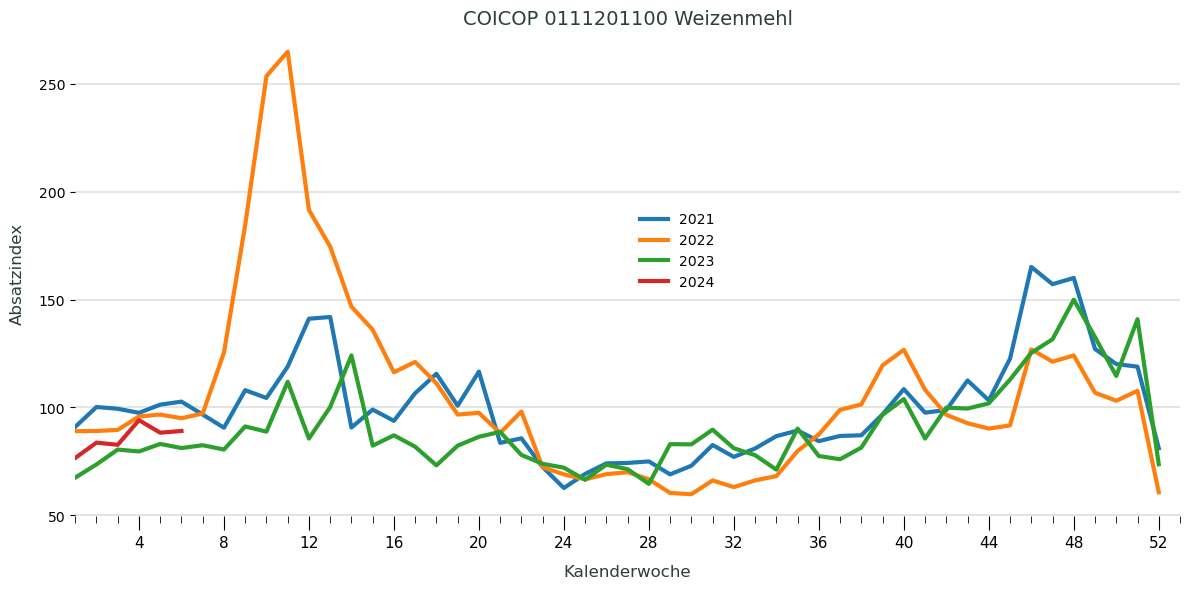

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("COICOP 0111201100 Weizenmehl", pad=4, size=14, color="#2C3E35")
ax.set_xlabel(xlabel='Kalenderwoche', labelpad=10, size=12, color="#2C3E35")
ax.set_ylabel(ylabel='Absatzindex', labelpad=10, size=12, color="#2C3E35")

ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='x', which='major', length=10, labelsize=11)
ax.tick_params(axis='x', which='minor', length= 5, labelsize=8)

ax.set_xlim(1,53)
ax.grid(which='major', axis='y', color='#666', linewidth=0.25)
    
plt.plot(scanData2023["week"], scanData2021["Absatzindex_0111201100"], label="2021", linewidth=3)
plt.plot(scanData2023["week"], scanData2022["Absatzindex_0111201100"], label="2022", linewidth=3)
plt.plot(scanData2023["week"], scanData2023["Absatzindex_0111201100"], label="2023", linewidth=3)
plt.plot(scanData2023["week"], scanData2024["Absatzindex_0111201100"], label="2024", linewidth=3)

ax.legend(loc="upper left", bbox_to_anchor=(.5, .65), facecolor="white", edgecolor="none")

plt.box(False)
plt.tight_layout()    
plt.savefig("Absatzindex_0111201100_Weizenmehl_2024kw.png")
plt.show()